## Library installations
install.packages("ggplot2")

install.packages("splm") 

install.packages("foreign")

install.packages("readstata13")

install.packages("lubridate")

install.packages("plm")

install.packages("taRifx")

install.packages("zoo")

install.packages("rgdal")

In [33]:
install.packages("rgdal")

package 'rgdal' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\szej01\AppData\Local\Temp\RtmpER619X\downloaded_packages


In [63]:
.libPaths()

[1] "C:/Program Files/R/R-3.5.1/library"

In [34]:
library(ggplot2)
library(splm)
library(foreign)
library(readstata13)
library(lubridate)
library(plm)
library(taRifx)
library(zoo)
library(rgdal)


rgdal: version: 1.3-6, (SVN revision 773)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Program Files/R/R-3.5.1/library/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Program Files/R/R-3.5.1/library/rgdal/proj
 Linking to sp version: 1.3-1 


OGR data source with driver: ESRI Shapefile 
Source: "D:\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\analytical_panel_qt_shapefile_panel_thiessen_polygons.shp", layer: "analytical_panel_qt_shapefile_panel_thiessen_polygons"
with 324675 features
It has 31 fields
Integer64 fields read as strings:  DUP_IDS 


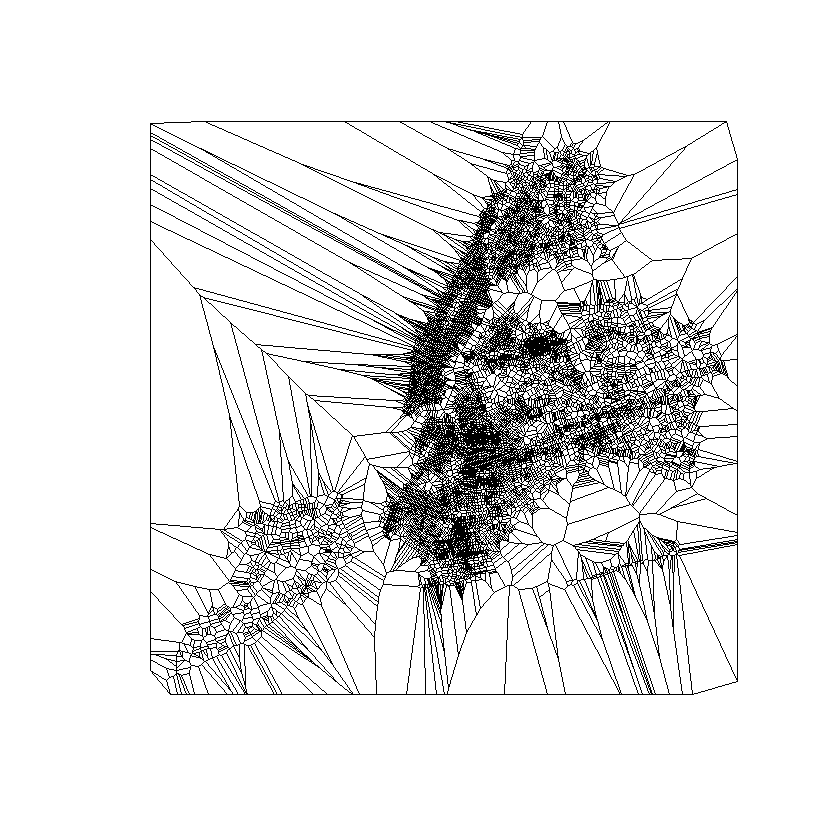

In [35]:
# input Stata file
mydata <- read.dta13("D:\\Box Sync\\Policy Evaluation\\working_data\\analytical_file_panel_qt.dta")
data.shape<-readOGR(dsn="D:\\Box Sync\\Policy Evaluation\\working_data\\analytical_panel_shapefile\\analytical_panel_qt_shapefile_panel_thiessen_polygons.shp",layer="analytical_panel_qt_shapefile_panel_thiessen_polygons")
plot(data.shape)

In [21]:
head(mydata)

intersection_id,quarter,year,quarterly,index,y,x,st1_name,st2_name,st3_name,...,day_personskilled,day_pedestriansinjured,day_pedestrianskilled,day_cyclistinjured,day_cyclistkilled,day_motoristinjured,day_motoristkilled,flag_collision,latenight_flag_collision,day_flag_collision
1,1,2013,212,0,199793.6,986336.1,ALLEN STREET,CANAL STREET,,...,0,0,0,0,0,0,0,1,0,1
2,1,2013,212,1,202206.2,982769.3,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,...,0,0,0,0,0,0,0,0,0,0
3,1,2013,212,2,201790.1,982805.6,AVENUE OF THE AMERICAS,LISPENARD STREET,WEST BROADWAY,...,0,0,0,0,0,0,0,0,0,0
4,1,2013,212,3,201530.0,982812.3,AVENUE OF THE AMERICAS,WALKER STREET,,...,0,0,0,0,0,0,0,1,1,1
5,1,2013,212,4,201226.1,982816.4,AVENUE OF THE AMERICAS,WHITE STREET,CHURCH STREET,...,0,0,0,0,0,0,0,0,0,0
6,1,2013,212,5,200696.0,984441.4,BAXTER STREET,CANAL STREET,,...,0,1,0,0,0,0,0,1,0,1


In [23]:
str(mydata)

'data.frame':	324675 obs. of  157 variables:
 $ intersection_id             : int  1 2 3 4 5 6 9 10 11 12 ...
 $ quarter                     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ year                        : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ quarterly                   : int  212 212 212 212 212 212 212 212 212 212 ...
 $ index                       : int  0 1 2 3 4 5 8 9 10 11 ...
 $ y                           : num  199794 202206 201790 201530 201226 ...
 $ x                           : num  986336 982769 982806 982812 982816 ...
 $ st1_name                    : chr  "ALLEN STREET" "AVENUE OF THE AMERICAS" "AVENUE OF THE AMERICAS" "AVENUE OF THE AMERICAS" ...
 $ st2_name                    : chr  "CANAL STREET" "LAIGHT STREET" "LISPENARD STREET" "WALKER STREET" ...
 $ st3_name                    : chr  "" "CANAL STREET" "WEST BROADWAY" "" ...
 $ st4_name                    : chr  "" "" "" "" ...
 $ dup                         : int  0 0 0 0 0 0 0 0 0 0 ...
 

quarterly <- as.yearqtr(year, quarter)
quarterly
format(quarterly, "%Y Quarter %q")

destring(intersecti)

In [29]:
model1 <- lm(collision_count~flag_LPIS,data=mydata)
summary(model1)


Call:
lm(formula = collision_count ~ flag_LPIS, data = mydata)

Coefficients:
(Intercept)    flag_LPIS  
     1.6450       0.3884  




Call:
lm(formula = collision_count ~ flag_LPIS, data = mydata)

Residuals:
   Min     1Q Median     3Q    Max 
-2.033 -1.645 -0.645  0.355 75.355 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.644956   0.004529  363.19   <2e-16 ***
flag_LPIS   0.388354   0.018418   21.09   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.501 on 324673 degrees of freedom
Multiple R-squared:  0.001368,	Adjusted R-squared:  0.001364 
F-statistic: 444.6 on 1 and 324673 DF,  p-value: < 2.2e-16


In [32]:
model2 <- plm(collision_count ~ flag_LPIS,
            data = mydata, index = c("intersection_id","quarterly"))
summary(model2)

Oneway (individual) effect Within Model

Call:
plm(formula = collision_count ~ flag_LPIS, data = mydata, index = c("intersection_id", 
    "quarterly"))

Balanced Panel: n = 12987, T = 25, N = 324675

Residuals:
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-17.360  -0.760  -0.040   0.520  61.538 

Coefficients:
           Estimate Std. Error t-value  Pr(>|t|)    
flag_LPIS -0.505051   0.014092 -35.839 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    741810
Residual Sum of Squares: 738770
R-Squared:      0.0041039
Adj. R-Squared: -0.037392
F-statistic: 1284.4 on 1 and 311687 DF, p-value: < 2.22e-16

In [31]:
fm <- collision_count~flag_LPIS
bsjktest(fm, data=mydata, test="C.1")

ERROR: Error in "listw" %in% class(listw): argument "listw" is missing, with no default
